# **Binary Step Function**
**f(x) = 1,    x>=0,     
x<0**

In [ ]:
def binary_step(x):
  if x<0:
    return 0
  else:
    return 1
binary_step(-1)

0

# **Linear Function**
**f(x)=ax**

In [ ]:
def linear_function(x):
  return 4*x
linear_function(4), linear_function(-2)

(16, -8)

# **Sigmoid**
The next activation function that we are going to look at is the Sigmoid function.
It is one of the most widely used non-linear activation function.
Sigmoid transforms the values between the range 0 and 1.
Here is the mathematical expression for sigmoid-
f(x) = 1/(1+e^-x)

In [ ]:
import numpy as np
def sigmoid_function(x):
  z = (1/(1 + np.exp(-x)))
  return z
sigmoid_function(7),sigmoid_function(-22)

(0.9990889488055994, 2.7894680920908113e-10)

# **Tanh**
The tanh function is very similar to the sigmoid function. The only difference is that it is
symmetric around the origin. The range of values in this case is from -1 to 1. Thus the inputs to
the next layers will not always be of the same sign. The tanh function is defined as-
tanh(x)=2sigmoid(2x)-1

tanh(x) = 2/(1+e^(-2x)) -1

In [ ]:
def tanh_function(x):
  z = (2/(1 + np.exp(-2*x))) -1
  return z
tanh_function(0.5), tanh_function(-1)

(0.4621171572600098, -0.7615941559557649)

# **ReLU - Rectified Linear Unit**
The ReLU function is another non-linear activation function.
The main advantage is that it does not activate all the neurons at the same time.   
This means that the neurons will only be deactivated if the output of the linear transformation is
less than 0.    
f(x)=max(0,x)   
Negative input values --> the result is zero, that means the neuron does not get activated.   
Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh function.

In [ ]:
def relu_function(x):
  if x<0:
    return 0
  else:
    return x
relu_function(7), relu_function(-7)

(7, 0)

# **Leaky ReLU**
Leaky ReLU function is an improved version of the ReLU function.
As we saw that for the ReLU function, the gradient is 0 for x<0, which would deactivate the neurons in that region.
Leaky ReLU is defined to address this problem.
Instead of defining the Relu function as 0 for negative values of x, we define it as an extremely
small linear component of x.

Here is the mathematical expression-   
f(x)= 0.01x,         x<0
= x, x>=0

In [ ]:
def leaky_relu_function(x):
  if x<0:
    return 0.01*x
  else:
    return x
leaky_relu_function(7), leaky_relu_function(-7)

(7, -0.07)

# **Parameterised ReLU**
The parameterised ReLU introduces a new parameter as a slope of the negative part of the
function.

Here’s how the ReLU function is modified to incorporate the slope parameter-
f(x) = x, x>=0

= ax, x<0

When the value of a is fixed to 0.01, the function acts as a Leaky ReLU function.
However, in case of a parameterised ReLU function, ‘a‘ is also a trainable parameter .
The network also learns the value of ‘a‘ for faster and more optimum convergence.

#**Exponential Linear Unit - ELU**
Exponential Linear Unit a variant of Rectiufied Linear Unit (ReLU) that modifies the slope of the
negative part of the function.
Unlike the leaky relu and parametric ReLU functions, instead of a straight line, ELU uses a log
curve for defning the negatice values.
It is defined as

f(x) = x, x>=0
= a(e^x-1), x<0

In [ ]:
def elu_function(x, a):
  if x<0:
    return a*(np.exp(x)-1)
  else:
    return x
elu_function(5, 0.1),elu_function(-5, 0.1)

(5, -0.09932620530009145)

# **Swish**

In [ ]:
def swish_function(x):
  return x/(1-np.exp(-x))
swish_function(-67), swish_function(4)

(5.349885844610276e-28, 4.074629441455096)

# **Softmax**

In [ ]:
def softmax_function(x):
  z = np.exp(x)
  z_ = z/z.sum()
  return z_
softmax_function([0.8, 1.2, 3.1])

array([0.08021815, 0.11967141, 0.80011044])

# **All Activation Functions:**
**ReLU (Rectified Linear Unit)  
Sigmoid  
Tanh  
Softmax    
Leaky ReLU  
ELU (Exponential Linear Unit)  
Swish**   

**Importing all the required libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalize the images to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0
# Flatten the images from 28x28 to 784-dimensional vectors
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the model
def create_model(activation_function):
  model = models.Sequential()
  # First hidden layer with the specified activation function
  model.add(layers.Dense(64, activation=activation_function, input_shape=(784,)))
  # Second hidden layer with the same activation function
  model.add(layers.Dense(64, activation=activation_function))
  # Output layer (softmax for classification)
  model.add(layers.Dense(10, activation='softmax')) # 10 classes for MNIST
  model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

  return model

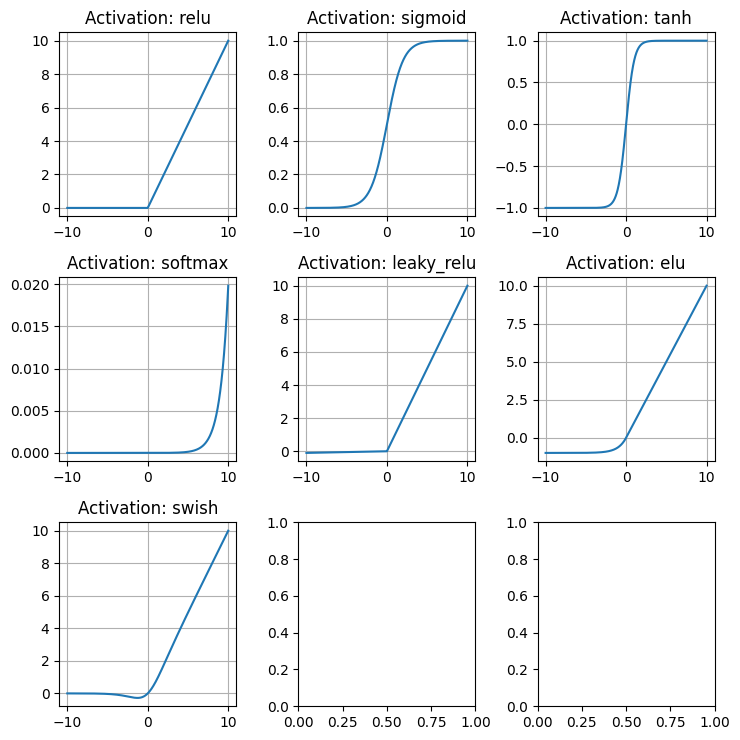

In [ ]:
# Activation functions to demonstrate
activation_functions = ['relu', 'sigmoid', 'tanh', 'softmax', 'leaky_relu', 'elu', 'swish']
# Create a subplot to visualize the activation functions
fig, axes = plt.subplots(3, 3, figsize=(7.5,7.5))
axes = axes.flatten()
# Plot and demonstrate each activation function
for idx, activation in enumerate(activation_functions):
  ax = axes[idx]
  # Generate an input range from -10 to 10 for plotting
  x = np.linspace(-10, 10, 1000)
  if activation == 'relu':
    y = np.maximum(0, x) # ReLU function
  elif activation == 'sigmoid':
    y = 1 / (1 + np.exp(-x)) # Sigmoid function
  elif activation == 'tanh':
    y = np.tanh(x) # Tanh function
  elif activation == 'softmax':
  # Softmax is not typically used in isolation for a single input, so we simulate i
    y = np.exp(x) / np.sum(np.exp(x)) # Softmax function (simplified)
  elif activation == 'leaky_relu':
    y = np.where(x > 0, x, 0.01 * x) # Leaky ReLU function
  elif activation == 'elu':
    y = np.where(x > 0, x, np.exp(x) - 1) # ELU function
  elif activation == 'swish':
    y = x * (1 / (1 + np.exp(-x))) # Swish function
  # Plot the activation function
  ax.plot(x, y)
  ax.set_title(f"Activation: {activation}")
  ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Train and evaluate the model for each activation function
results = {}
for activation in activation_functions:
  print(f"\nTraining model with {activation} activation function...")
  model = create_model(activation_function=activation)
  # Train the model (we will train for a few epochs for demonstration purposes)
  model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))
  # Evaluate the model on the test data
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
  results[activation] = test_acc
  print(f"{activation} test accuracy: {test_acc:.4f}")
# Print the results
print("\nTest accuracy for each activation function:")
for activation, accuracy in results.items():
  print(f"{activation}: {accuracy:.4f}")


Training model with relu activation function...
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8302 - loss: 0.5900 - val_accuracy: 0.9509 - val_loss: 0.1669
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9533 - loss: 0.1582 - val_accuracy: 0.9614 - val_loss: 0.1249
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9695 - loss: 0.1042 - val_accuracy: 0.9688 - val_loss: 0.1025
relu test accuracy: 0.9688

Training model with sigmoid activation function...
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6778 - loss: 1.2124 - val_accuracy: 0.9234 - val_loss: 0.2866
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9260 - loss: 0.2623 - val_accuracy: 0.9397 - val_loss: 0.2086
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9456 - loss: 0.1904 - val_accuracy: 0.9517 - val_loss: 0.1649
sigmoid test accuracy: 0.9517

Training model with tanh activation function...
Epoch 1/3
938/938 ━━━━━━━━━━━━━